***
## SVM Algorithm
***

#### Linear Model

$$w \cdot x - b = 0$$

$$\begin{matrix} w \cdot x_i - b \geq 1~~if~y_i = 1 \\ w \cdot x_i - b \leq -1~~if~y_i = -1 \end{matrix}$$

$$y_i(w \cdot x_i - b) \geq 1$$

#### Cost Function : Hinge Loss

$$l = max(0, y_i(w \cdot x_i - b))$$

$$l = \begin{cases} 0 & y \cdot f(x) \geq 1 \\ 1 - y \cdot f(x) & otherwise \end{cases}$$

#### Regularization

$$J = \lambda \left \| w \right \|^2 + \frac{1}{n}\sum_{i=1}^{n} max(0, y_i(w \cdot x_i - b))$$

$$J_i = \begin{cases} \lambda \left \| w \right \|^2 & y_i \cdot f(x) \geq 1 \\ \lambda \left \| w \right \|^2 + 1 - y_i(w \cdot x_i - b) & otherwise \end{cases}$$

#### Gradients

$$\frac{dJ_i}{dw_k} = \begin{cases} 2 \lambda w_k & y_i \cdot f(x) \geq 1 \\ 2 \lambda w_k - y_i \cdot x_i & otherwise \end{cases}$$

$$\frac{dJ_i}{db} = \begin{cases} 0 & y_i \cdot f(x) \geq 1 \\ y_i & otherwise \end{cases}$$

#### Update Rule

$$w = w - \alpha dw$$
$$b = b - \alpha db$$

&emsp;where $\alpha$ is the learning rate.

***

In [1]:
import numpy as np 


class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

Accuracy:  1.0
[0.58977016 0.17946483] -0.1520000000000001


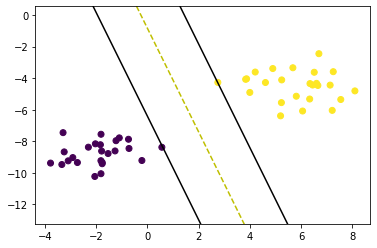

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
y_pred = clf.predict(X)

acc = accuracy(y, y_pred)
print ("Accuracy: ", acc)

print(clf.w, clf.b)

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()

## References
- [SVM (Support Vector Machine) in Python - Machine Learning From Scratch 07 - Python Tutorial](https://youtu.be/UX0f9BNBcsY?list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E)
- [MLfromscratch](https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/svm.py)